In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Reading data fpr modeling
df = pd.read_parquet('processed_data.parquet', engine='pyarrow')
df.head()

,onehot__Gender_Female,onehot__Gender_Male,onehot__OwnHome_Own,onehot__OwnHome_Rent,onehot__Married_Married,onehot__Married_Single,onehot__Location_Close,onehot__Location_Far,ordinal_age__Age,ordinal_history__History,ordinal__Children,ordinal__Catalogs,num__Salary,num__AmountSpent
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,-0.281164,-0.480716
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.244963,0.105383
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-1.392239,-0.958548
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.963893,1.269254
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0,0.401820,0.090809


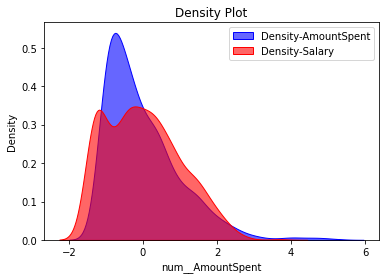

In [3]:
# Create density plots
sns.kdeplot(df['num__AmountSpent'], label = "Density-AmountSpent", color = "blue", fill=True, alpha=0.6)
sns.kdeplot(df['num__Salary'], label = "Density-Salary", color="red", fill=True, alpha=0.6)

# Add title and legend
plt.title("Density Plot")
plt.legend()
plt.show()


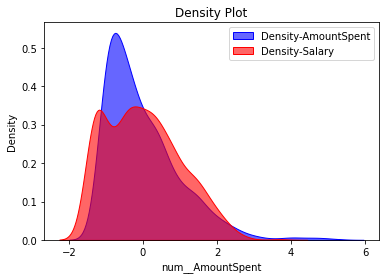

In [4]:
# Create density plots
sns.kdeplot(df['num__AmountSpent'], label = "Density-AmountSpent", color = "blue", fill=True, alpha=0.6)
sns.kdeplot(df['num__Salary'], label = "Density-Salary", color="red", fill=True, alpha=0.6)

# Add title and legend
plt.title("Density Plot")
plt.legend()
plt.show()

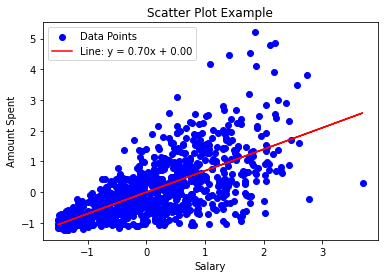

In [5]:
# Scatter plot
# Create scatter plot
X = df['num__Salary']
y = df['num__AmountSpent']

plt.scatter(X,  y, color="blue", label="Data Points")

# Add a line (e.g., regression line)
m, b = np.polyfit(X, y, 1)  # Linear regression: slope (m) and intercept (b)
plt.plot(X, m * X + b, color="red", label=f"Line: y = {m:.2f}x + {b:.2f}")


# Add labels and title
plt.xlabel("Salary")
plt.ylabel("Amount Spent")
plt.title("Scatter Plot Example")
plt.legend()

# Display the plot
plt.show()

In [6]:
df.head()

,onehot__Gender_Female,onehot__Gender_Male,onehot__OwnHome_Own,onehot__OwnHome_Rent,onehot__Married_Married,onehot__Married_Single,onehot__Location_Close,onehot__Location_Far,ordinal_age__Age,ordinal_history__History,ordinal__Children,ordinal__Catalogs,num__Salary,num__AmountSpent
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,-0.281164,-0.480716
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.244963,0.105383
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-1.392239,-0.958548
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.963893,1.269254
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,1.0,0.401820,0.090809


### Function to check multi-colinarity


In [7]:
def vif(X):
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif)

### Funtion to fit a regression model

In [33]:
def regression(X,y):

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_with_intercept, y, test_size=0.2, random_state=42)


    # Create and fit the model
    model = sm.OLS(y_train, X_train).fit()
    


    
    return [model, X_test, y_test]

### 1. Simple Regression with intercept
Amount Spent ~ constant + Salary

In [29]:
# Add a constant to the independent variable for the intercept
X_with_intercept = sm.add_constant(X)
print(X_with_intercept.head())

model = regression(X_with_intercept,y)[0]

# Print the summary
print(model.summary())

   const  num__Salary
0    1.0    -0.281164
1    1.0     0.244963
2    1.0    -1.392239
3    1.0     0.963893
4    1.0     0.401820
                            OLS Regression Results                            
Dep. Variable:       num__AmountSpent   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     799.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.17e-122
Time:                        17:07:20   Log-Likelihood:                -878.21
No. Observations:                 800   AIC:                             1760.
Df Residuals:                     798   BIC:                             1770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


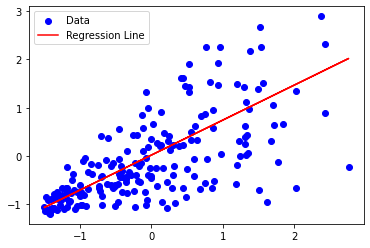

In [35]:
X_test = regression(X_with_intercept,y)[1]
y_test = regression(X_with_intercept,y)[2]

# Predict values
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test['num__Salary'], y_test, color="blue", label="Data")
plt.plot(X_test['num__Salary'], y_pred, color="red", label="Regression Line")
plt.legend()
plt.show()

### 2. Simple Regression without intercept
Amount Spent ~ Salary (as intercept was insignificant)

In [ ]:
X.head()

In [ ]:
regression(X, y)

### 3. Regression with Salary and Gender
Amount Spent ~ Salary + Gender

The R2 still remains poor; we will try other models
VIF <5; low multi-colinearity

In [36]:
X = df[['num__Salary', 'onehot__Gender_Male']]
vif(X)


              Variable       VIF
0          num__Salary  1.035839
1  onehot__Gender_Male  1.035839


In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       num__AmountSpent   R-squared (uncentered):                   0.501
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              400.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   3.83e-121
Time:                        17:09:18   Log-Likelihood:                         -878.12
No. Observations:                 800   AIC:                                      1760.
Df Residuals:                     798   BIC:                                      1770.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### 4. Regression with Salary and Home Owner
Amount Spent ~ Salary + Home Owner 

The R2 still remains poor and being a home owner is an insignificant variable

In [38]:
X = df[['num__Salary', 'onehot__OwnHome_Own']]
vif(X)

              Variable       VIF
0          num__Salary  1.114507
1  onehot__OwnHome_Own  1.114507


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       num__AmountSpent   R-squared (uncentered):                   0.501
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              401.3
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   2.42e-121
Time:                        17:09:33   Log-Likelihood:                         -877.66
No. Observations:                 800   AIC:                                      1759.
Df Residuals:                     798   BIC:                                      1769.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### 5. Regression with marital status and location
Amount Spent ~ Salary + Married + Location

The R2 still remains poor and being married is a insignificant variable

In [40]:
X = df[['num__Salary', 'onehot__Married_Married', 'onehot__Location_Close']]
vif(X)

                  Variable       VIF
0              num__Salary  1.509985
1  onehot__Married_Married  2.356887
2   onehot__Location_Close  1.821831


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       num__AmountSpent   R-squared (uncentered):                   0.539
Model:                            OLS   Adj. R-squared (uncentered):              0.537
Method:                 Least Squares   F-statistic:                              310.7
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   1.52e-133
Time:                        17:09:42   Log-Likelihood:                         -846.29
No. Observations:                 800   AIC:                                      1699.
Df Residuals:                     797   BIC:                                      1713.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### 6. Regression with marital status, location and Children 
Amount Spent ~ Salary + Married+ Location + Children 

In [42]:
df.columns

Index(['onehot__Gender_Female', 'onehot__Gender_Male', 'onehot__OwnHome_Own',
       'onehot__OwnHome_Rent', 'onehot__Married_Married',
       'onehot__Married_Single', 'onehot__Location_Close',
       'onehot__Location_Far', 'ordinal_age__Age', 'ordinal_history__History',
       'ordinal__Children', 'ordinal__Catalogs', 'num__Salary',
       'num__AmountSpent'],
      dtype='object')

In [43]:
# Add a variable to check if consumers have children
df['have_children'] = df['ordinal__Children'].apply(lambda x: 0 if x == 0 else 1)
df['have_children'].value_counts()
# ~45% consumers donot have children
# 1 is consumers have children and 0 otherwise

1    538
0    462
Name: have_children, dtype: int64

In [44]:
X = df[['num__Salary', 'onehot__Married_Married', 'onehot__Location_Close', 'have_children']]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       num__AmountSpent   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              238.8
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   1.18e-134
Time:                        17:16:31   Log-Likelihood:                         -840.74
No. Observations:                 800   AIC:                                      1689.
Df Residuals:                     796   BIC:                                      1708.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### 6. Regression with marital status, location, age and Children

Amount Spent ~ Salary + Married+ Location + Age + Children

In [45]:
df['ordinal_age__Age'].value_counts()

1.0    508
0.0    287
2.0    205
Name: ordinal_age__Age, dtype: int64

In [46]:
X = df[['num__Salary', 'onehot__Married_Married', 'onehot__Location_Close', 'have_children']]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       num__AmountSpent   R-squared (uncentered):                   0.545
Model:                            OLS   Adj. R-squared (uncentered):              0.543
Method:                 Least Squares   F-statistic:                              238.8
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   1.18e-134
Time:                        17:16:43   Log-Likelihood:                         -840.74
No. Observations:                 800   AIC:                                      1689.
Df Residuals:                     796   BIC:                                      1708.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------